In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import PassiveAggressiveRegressor


from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Bitcoin/BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

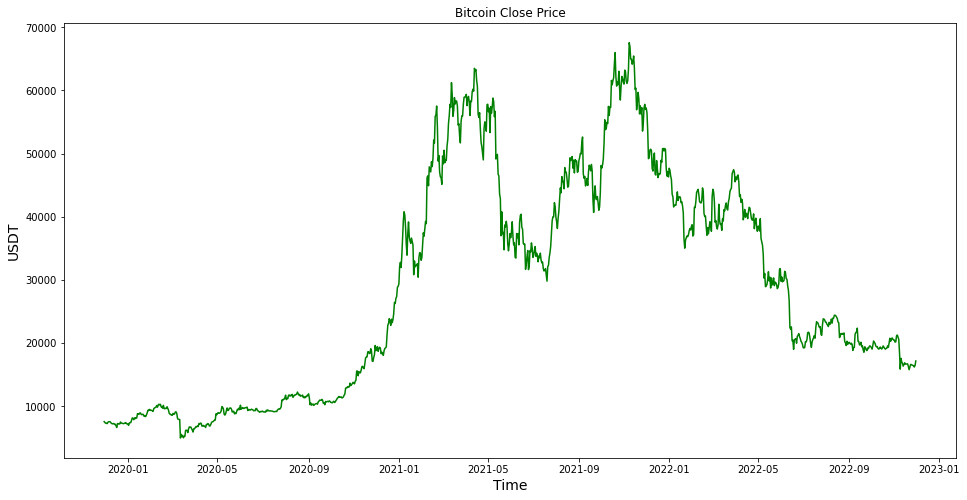

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="green")
plt.title('Bitcoin Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
846,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
847,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
848,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
849,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
853,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
854,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
855,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
856,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,7764.057129,7836.102051,7515.849609,7569.629883,17158194786
1,7571.616211,7571.616211,7291.341797,7424.292480,18720708479
2,7424.036133,7474.818848,7233.399414,7321.988281,17082040706
3,7323.975586,7418.858887,7229.356934,7320.145508,14797485769
4,7320.125000,7539.784668,7170.922852,7252.034668,21664240918


In [10]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [11]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


# **Model Selection**

In [14]:
models = [LinearRegression(),
                svm.SVR(),
                RandomForestRegressor(n_estimators=30, n_jobs=-1, max_depth=20),
                DecisionTreeRegressor(),
                KNeighborsRegressor(),
                make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)),
                XGBRegressor(n_estimators=1000),
                PassiveAggressiveRegressor()
               ]

In [15]:
name = ['Linear Regression', 'Support Vector Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'KNeighborsRegressor', 'SGD Regressor', 'XGBRegressor', 'PassiveAggressiveRegressor']
mse = []
rmse = []
mae = []
r2 = []

for alg in models:
    
    alg.fit(X_train,y_train)
    y_pred=alg.predict(X_test)
    
    mse.append(mean_squared_error(y_test, y_pred))
    rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
    mae.append(sqrt(mean_absolute_error(y_test, y_pred)))   
    r2.append(r2_score(y_test, y_pred))  
    

results = pd.DataFrame({"Model Name": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2_SCORE": r2})
results

[02:13:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,MSE,RMSE,MAE,R2_SCORE
0,Linear Regression,0.000868,0.029469,0.147952,0.947689
1,Support Vector Regression,0.002781,0.052733,0.201056,0.832493
2,Random Forest Regressor,0.002162,0.046502,0.189668,0.869741
3,Decision Tree Regressor,0.004488,0.066995,0.232254,0.729633
4,KNeighborsRegressor,0.011389,0.106720,0.298219,0.313953
5,SGD Regressor,0.001579,0.039737,0.177182,0.904884
6,XGBRegressor,0.001934,0.043972,0.183820,0.883531
7,PassiveAggressiveRegressor,0.001839,0.042886,0.184705,0.889210


In [16]:
print(f"Highest Recall Score achieved by {results.R2_SCORE.idxmax(axis = 0)} at = {max(results['R2_SCORE'] )}")
print(f"Highest Mean Squared Error achieved by {results['MSE'].idxmin(axis = 0)} at = {min(results['MSE'])}")
print(f"Best Root Mean Square Error achieved by {results['RMSE'].idxmin(axis = 0)} at = {min(results['RMSE'])}")
print(f"Best Mean Absolute Error achieved by {results['MAE'].idxmin(axis = 0)} at = {min(results['MAE'] )}")

Highest Recall Score achieved by 0 at = 0.9476891505377195
Highest Mean Squared Error achieved by 0 at = 0.0008684173437588075
Best Root Mean Square Error achieved by 0 at = 0.0294689216592465
Best Mean Absolute Error achieved by 0 at = 0.1479519164127787


# **Performance Evaluation**

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

train_predict:  (564,)
test_predict:  (225,)


In [19]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.018672840272317918
Train data MSE:  0.0003486749638354979
Train data MAE:  0.011083497436257911
Train data R2 score: 0.9955756101019707


In [20]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.0294689216592465
Test data MSE:  0.0008684173437588075
Test data MAE:  0.021889769570213848
Test data R2 score: 0.9476891505377195


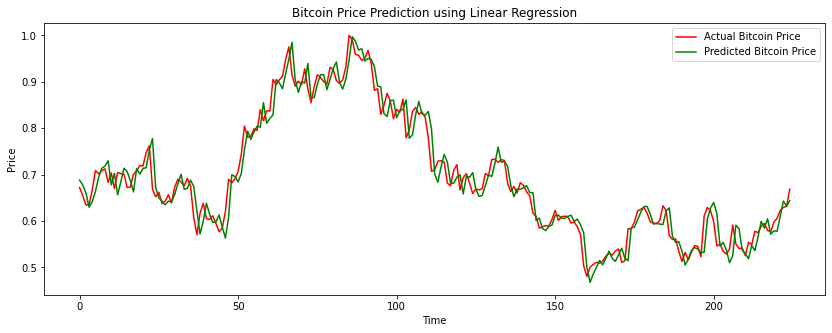

In [21]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()